<a href="https://colab.research.google.com/github/JuanDavidV8/Agro_project/blob/main/Desafio_algoritmo_ML_Juan_Valencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del Dataset

In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/Data science/Bases de datos/Different_stores_dataset.csv')

In [ ]:
sales.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon


In [ ]:
sales1 = sales[['gender', 'age',
       'category', 'quantity', 'selling_price_per_unit', 'cost_price_per_unit',
       'payment_method']]

In [ ]:
sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  99457 non-null  object 
 1   age                     99457 non-null  int64  
 2   category                99457 non-null  object 
 3   quantity                99457 non-null  int64  
 4   selling_price_per_unit  99457 non-null  float64
 5   cost_price_per_unit     99457 non-null  float64
 6   payment_method          99457 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 5.3+ MB


In [ ]:
sales1.shape

(99457, 7)

In [ ]:
sales1.describe()

,age,quantity,selling_price_per_unit,cost_price_per_unit
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.004424,689.256321,605.113854
std,14.990054,1.415237,941.184567,858.838256
min,18.000000,1.000000,5.230000,3.661000
25%,30.000000,2.000000,45.450000,31.815000
50%,43.000000,3.000000,203.300000,162.640000
75%,56.000000,4.000000,1200.320000,1080.306000
max,69.000000,15.000000,5250.000000,4725.000000


In [ ]:
sales1.columns

Index(['gender', 'age', 'category', 'quantity', 'selling_price_per_unit',
       'cost_price_per_unit', 'payment_method'],
      dtype='object')

In [ ]:
sales1.head()

,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method
0,Female,28,Clothing,5,1500.40,1425.380,Credit Card
1,Male,21,Shoes,3,1800.51,1620.459,Debit Card
2,Male,20,Clothing,1,300.08,295.060,Cash
3,Female,66,Shoes,5,3000.85,2900.765,Credit Card
4,Female,53,Books,4,60.60,45.450,Cash


In [ ]:
dummy_gender1 = pd.get_dummies(sales1['payment_method'], prefix='pay')
dummy_gender2 = pd.get_dummies(sales1['gender'], prefix= 'gender')

In [ ]:
dummy_gender1

,pay_Cash,pay_Credit Card,pay_Debit Card
0,0,1,0
1,0,0,1
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
99452,0,1,0
99453,1,0,0
99454,0,0,1
99455,1,0,0


In [ ]:
dummy_gender2

,gender_Female,gender_Male
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
99452,1,0
99453,0,1
99454,0,1
99455,0,1


In [ ]:
sales2 = pd.concat([sales1,dummy_gender1, dummy_gender2],axis=1)

In [ ]:
sales2 = sales2.drop(['gender','payment_method'], axis=1)

In [ ]:
sales2

,age,category,quantity,selling_price_per_unit,cost_price_per_unit,pay_Cash,pay_Credit Card,pay_Debit Card,gender_Female,gender_Male
0,28,Clothing,5,1500.40,1425.3800,0,1,0,1,0
1,21,Shoes,3,1800.51,1620.4590,0,0,1,0,1
2,20,Clothing,1,300.08,295.0600,1,0,0,0,1
3,66,Shoes,5,3000.85,2900.7650,0,1,0,1,0
4,53,Books,4,60.60,45.4500,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99452,45,Souvenir,5,58.65,43.9875,0,1,0,1,0
99453,27,Food & Beverage,2,10.46,7.3220,1,0,0,0,1
99454,63,Food & Beverage,2,10.46,7.3220,0,0,1,0,1
99455,56,Technology,4,4200.00,3780.0000,1,0,0,0,1


In [ ]:
sales2.shape

(99457, 10)

In [ ]:
sales2.columns

Index(['age', 'category', 'quantity', 'selling_price_per_unit',
       'cost_price_per_unit', 'pay_Cash', 'pay_Credit Card', 'pay_Debit Card',
       'gender_Female', 'gender_Male'],
      dtype='object')

# Reducción de dimensionalidad

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(sales2[['age', 'quantity', 'selling_price_per_unit',
       'cost_price_per_unit', 'pay_Cash', 'pay_Credit Card', 'pay_Debit Card',
       'gender_Female', 'gender_Male']])

In [ ]:
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00001005e+00,  5.19497576e-04,  1.69415089e-03,
         1.83282705e-03,  1.81888946e-03,  3.98379328e-05,
        -2.30019880e-03,  2.15049052e-03, -2.15049052e-03],
       [ 5.19497576e-04,  1.00001005e+00,  3.44277952e-01,
         3.65330619e-01, -1.83820024e-03,  2.20966774e-03,
        -3.50976265e-04, -6.01322292e-05,  6.01322292e-05],
       [ 1.69415089e-03,  3.44277952e-01,  1.00001005e+00,
         9.97937837e-01,  1.49673106e-03, -5.58057534e-04,
        -1.19017057e-03, -1.44992723e-03,  1.44992723e-03],
       [ 1.83282705e-03,  3.65330619e-01,  9.97937837e-01,
         1.00001005e+00,  1.49006128e-03, -5.78027588e-04,
        -1.15816136e-03, -1.45613366e-03,  1.45613366e-03],
       [ 1.81888946e-03, -1.83820024e-03,  1.49673106e-03,
         1.49006128e-03,  1.00001005e+00, -6.61367589e-01,
        -4.52090868e-01, -3.02379906e-03,  3.02379906e-03],
       [ 3.98379328e-05,  2.20966774e-03, -5.58057534e-04,
        -5.78027588e-04, -6.61367589e-01,  1.000010

In [ ]:
e_values, e_vectors = np.linalg.eig(covariance_matrix)

In [ ]:
variance_explained = []
for i in e_values:
    variance_explained.append((i/sum(e_values))*100)

print(variance_explained)

[0.02020074833958601, 11.110721034058388, 8.795149486182078, 14.783495420444694, 24.518329641647362, 22.224262875993276, 18.547840793334558, 5.518653568518636e-14, -1.2335687353118447e-15]


In [ ]:
pca = PCA(n_components=3)
pca.fit(scaled)

PCA(n_components=3)

In [ ]:
pca.explained_variance_ratio_

array([0.2451833 , 0.22224263, 0.18547841])

In [ ]:
reduced_escaled = pca.transform(scaled)
reduced_escaled

array([[ 1.70872305, -1.21934697,  1.47159129],
       [ 1.55559176,  1.71644718,  0.50204249],
       [-1.0261022 ,  1.77232103, -1.34054537],
       ...,
       [-1.17778452,  1.74361459,  0.49111492],
       [ 5.14672977,  1.6840164 , -1.33591784],
       [-0.91400599, -1.1860204 ,  1.46349498]])

In [ ]:
sales2['pca_1'] = scaled[:,0]
sales2['pca_2'] = scaled[:,1]
sales2['pca_3'] = scaled[:,2]
sales2

,age,category,quantity,selling_price_per_unit,cost_price_per_unit,pay_Cash,pay_Credit Card,pay_Debit Card,gender_Female,gender_Male,pca_1,pca_2,pca_3
0,28,Clothing,5,1500.40,1425.3800,0,1,0,1,0,-1.029160,1.410072,0.861837
1,21,Shoes,3,1800.51,1620.4590,0,0,1,0,1,-1.496139,-0.003126,1.180703
2,20,Clothing,1,300.08,295.0600,1,0,0,0,1,-1.562850,-1.416324,-0.413498
3,66,Shoes,5,3000.85,2900.7650,0,1,0,1,0,1.505867,1.410072,2.456060
4,53,Books,4,60.60,45.4500,1,0,0,1,0,0.638621,0.703473,-0.667945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,45,Souvenir,5,58.65,43.9875,0,1,0,1,0,0.104931,1.410072,-0.670017
99453,27,Food & Beverage,2,10.46,7.3220,1,0,0,0,1,-1.095871,-0.709725,-0.721219
99454,63,Food & Beverage,2,10.46,7.3220,0,0,1,0,1,1.305733,-0.709725,-0.721219
99455,56,Technology,4,4200.00,3780.0000,1,0,0,0,1,0.838754,0.703473,3.730152


In [ ]:
sales2 = sales2.drop(['age', 'quantity', 'selling_price_per_unit',
       'cost_price_per_unit', 'pay_Cash', 'pay_Credit Card', 'pay_Debit Card',
       'gender_Female', 'gender_Male'], axis=1)

In [ ]:
sales2

,category,pca_1,pca_2,pca_3
0,Clothing,-1.029160,1.410072,0.861837
1,Shoes,-1.496139,-0.003126,1.180703
2,Clothing,-1.562850,-1.416324,-0.413498
3,Shoes,1.505867,1.410072,2.456060
4,Books,0.638621,0.703473,-0.667945
...,...,...,...,...
99452,Souvenir,0.104931,1.410072,-0.670017
99453,Food & Beverage,-1.095871,-0.709725,-0.721219
99454,Food & Beverage,1.305733,-0.709725,-0.721219
99455,Technology,0.838754,0.703473,3.730152


# Entrenamiento del modelo

In [ ]:
Xvars = sales2.drop(['category'], axis=1)
Yvars = sales2 [['category']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Xvars, Yvars, test_size= 0.3, random_state= 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Classifier = RandomForestClassifier(n_estimators=20, random_state=42,  criterion='gini', max_features='sqrt', max_depth=10)

Classifier.fit(X_train_std, Y_train)

print('Train acurracy : %.5f' % Classifier.score(X_train_std, Y_train))
print('Test acurracy : %.5f' % Classifier.score(X_test_std, Y_test))

<ipython-input-23-fea7c5b5f9d2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Classifier.fit(X_train_std, Y_train)


Train acurracy : 0.99494
Test acurracy : 0.99521


[Text(0.5, 0, 'Clases predichas'), Text(0, 0.5, 'Clases verdaderas')]

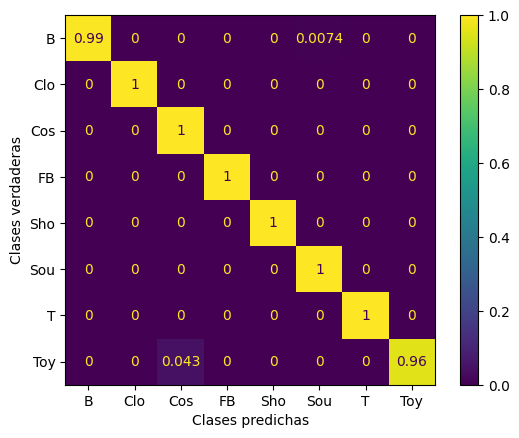

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = Classifier.predict(X_test_std)
cm = confusion_matrix(Y_test, y_pred, normalize='true')

cm_display = ConfusionMatrixDisplay(cm, display_labels=['B','Clo','Cos','FB','Sho','Sou','T','Toy'])
cm_display.plot()
cm_display.ax_.set(xlabel='Clases predichas', ylabel='Clases verdaderas')

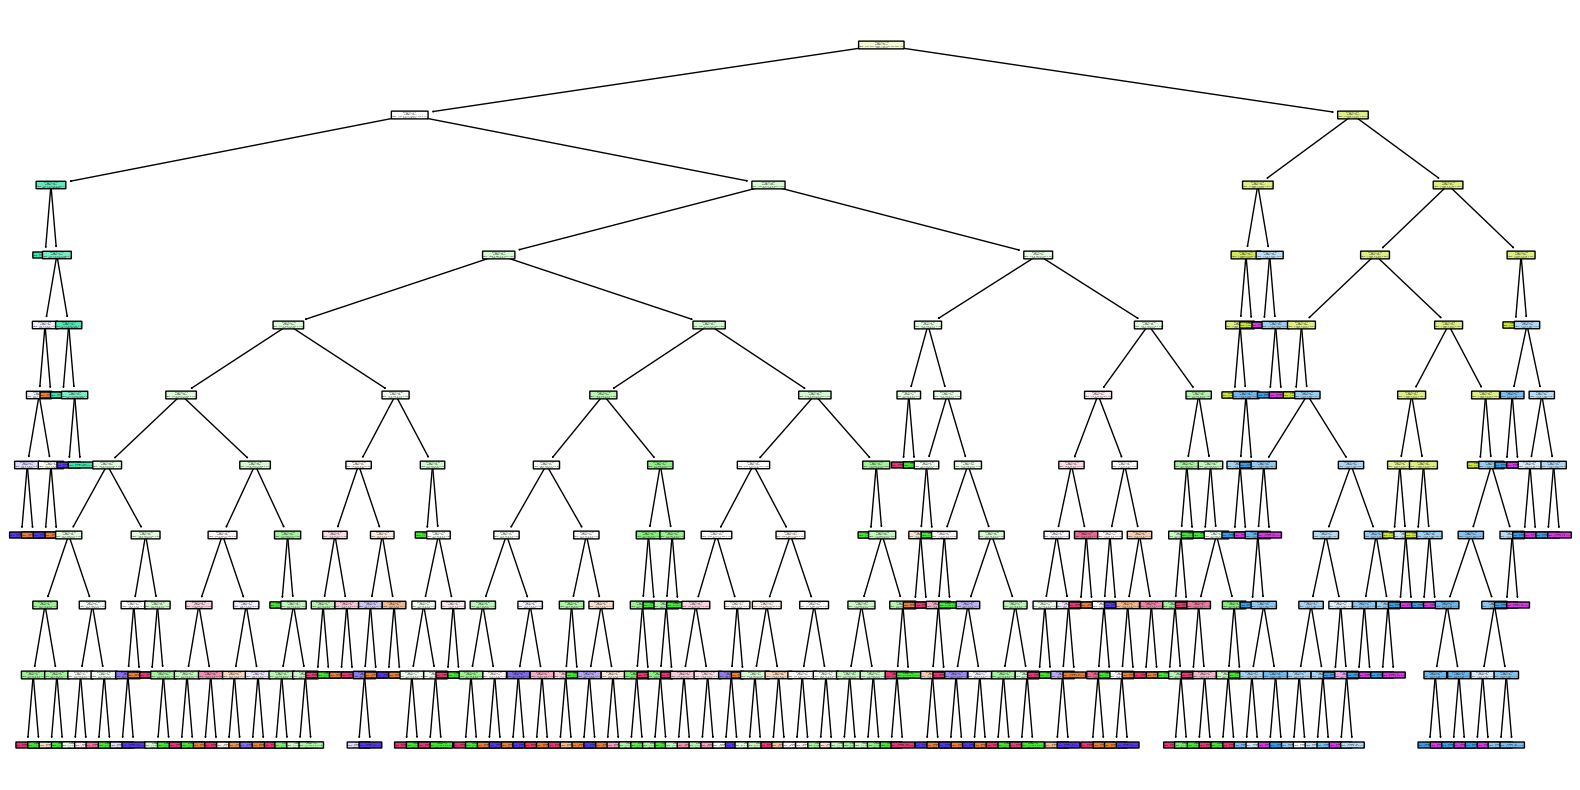

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_to_visualize = 1

feature_names=['pca1', 'pca2', 'pca3']
class_names=['B', 'Clo', 'Cos', 'FB', 'Sho', 'Sou', 'T', 'Toy']

single_tree = Classifier.estimators_[tree_to_visualize]

plt.figure(figsize=(20, 10))
plot_tree(single_tree,
          feature_names=[f'Feature {i}' for i in range(X_train_std.shape[1])],
          class_names=[str(cls) for cls in Classifier.classes_],
          filled=True, rounded=True, impurity=True, precision=2)

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

Y_pred = Classifier.predict(X_test)

test_accuracy = accuracy_score(Y_test, Y_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


% de aciertos sobre el set de evaluación: 0.9367920101883505


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(Y_test, Y_pred)

print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1score: {}'.format(fscore))
print('Support: {}'.format(support))

Precision: [0.84022556 1.         0.971873   1.         0.69670588 0.85616438
 1.         1.        ]
Recall: [0.90060443 0.87568714 1.         0.98598236 1.         0.83056478
 1.         0.95680628]
F1score: [0.86936791 0.9337241  0.9857359  0.99294171 0.82124532 0.84317032
 1.         0.97792642]
Support: [ 1489 10369  4561  4423  2961  1505  1474  3056]
